In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)#adds a nice background to the graphs and tells python to actually display the graph
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import statistics

# Reading and getting familiar with the dataset

In [2]:
ds=pd.read_csv("TaxiFare.csv")

In [3]:
ds.shape

(50000, 8)

In [4]:
ds.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
ds.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
ds.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
ds.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [9]:
pd.crosstab(ds["no_of_passenger"],ds["amount"])

amount,-5.00,-3.00,-2.90,-2.50,0.00,0.01,2.50,2.90,3.00,3.30,...,128.61,128.83,135.00,136.00,143.00,149.00,160.00,165.00,180.00,200.00
no_of_passenger,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,1,5,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,3,3,1,169,87,68,264,...,0,1,1,1,1,0,1,2,1,1
2,0,0,0,0,0,0,15,20,7,55,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,4,4,0,22,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,1,11,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,12,6,7,24,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='no_of_passenger', ylabel='count'>

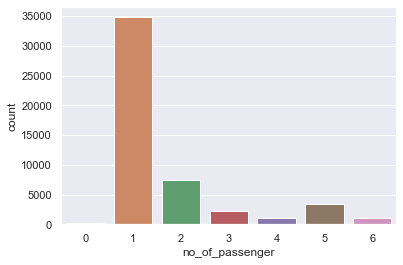

In [10]:
sns.countplot(x='no_of_passenger',data=ds)

# Looking for correlation between the dataset

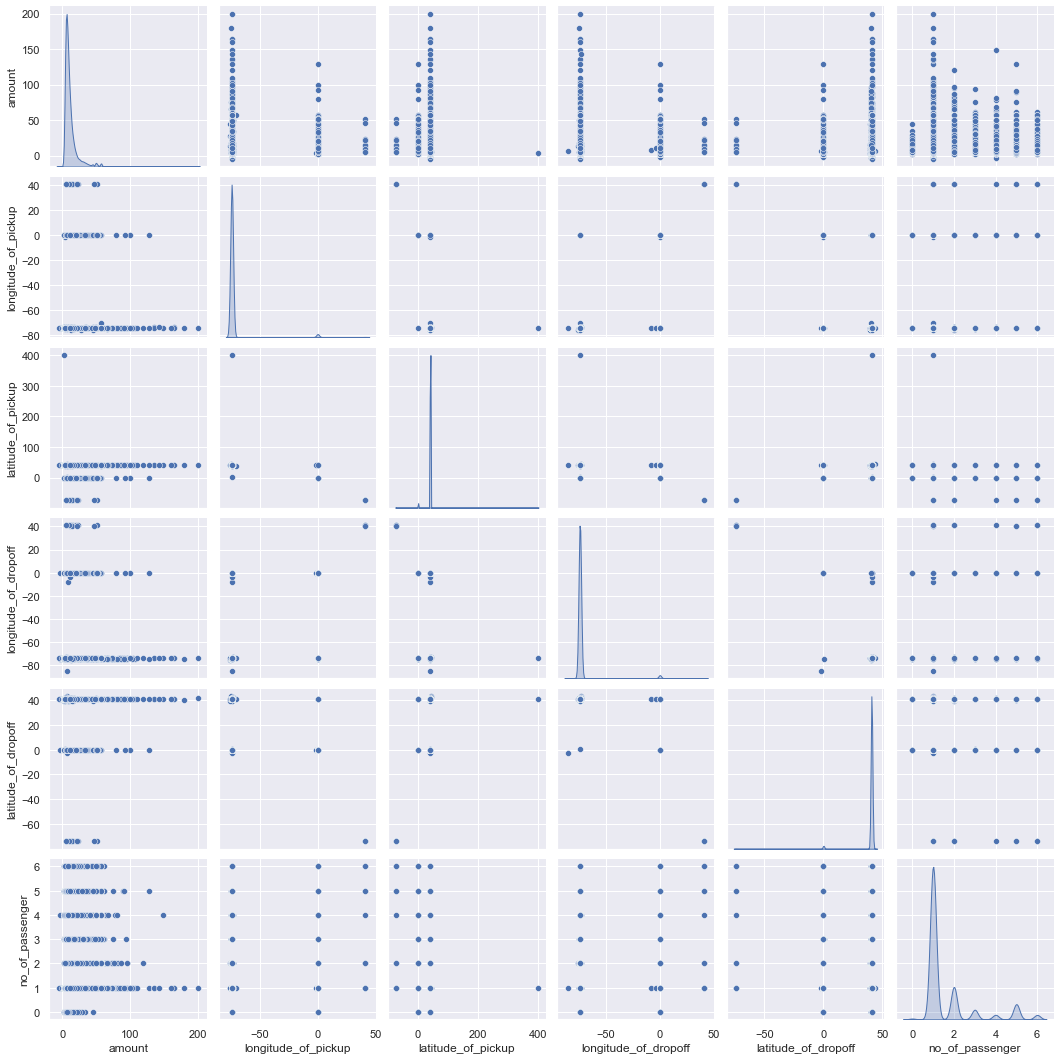

In [11]:
sns.pairplot(ds,diag_kind='kde')

In [12]:
ds=ds.drop('unique_id',axis=1)  ##dropping the unnecessary element for analysis
ds=ds.drop('date_time_of_pickup',axis=1)

In [13]:
ds.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [14]:
corr=ds.corr()          #finding correlation

In [15]:
corr   #no strong correlation found

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


# Modifying the dataset

In [16]:
# count zeros in 1d array

n_zeros = np.count_nonzero(ds['latitude_of_pickup']==0)

# display the count of zeros

print(n_zeros)

955


In [17]:
#finding median and replacing 0 by median

m1=ds['latitude_of_pickup'].median()
ds['latitude_of_pickup'].replace(0,m1,inplace=True)
m2=ds['latitude_of_dropoff'].median()
ds['latitude_of_dropoff'].replace(0,m2,inplace=True)
m3=ds['longitude_of_pickup'].median()
ds['longitude_of_pickup'].replace(0,m3,inplace=True)
m4=ds['longitude_of_dropoff'].median()
ds['longitude_of_dropoff'].replace(0,m4,inplace=True)
ds.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [18]:
corr=ds.corr()
corr  #still no correlation established

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.016099,-0.012164,0.014189,-0.011804,0.016583
longitude_of_pickup,0.016099,1.000000,-0.776131,0.925342,-0.950022,0.008706
latitude_of_pickup,-0.012164,-0.776131,1.000000,-0.778100,0.805896,-0.007958
longitude_of_dropoff,0.014189,0.925342,-0.778100,1.000000,-0.950727,0.007759
latitude_of_dropoff,-0.011804,-0.950022,0.805896,-0.950727,1.000000,-0.008550
no_of_passenger,0.016583,0.008706,-0.007958,0.007759,-0.008550,1.000000


# Trying out various models

In [19]:
x=ds.drop('amount',axis=1)
y=ds['amount']

In [20]:
model1=LinearRegression()

In [21]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

In [22]:
model1.fit(x_train,y_train)

LinearRegression()

In [23]:
model1.score(x_train,y_train)

0.000682988452391009

In [24]:
model1.score(x_test,y_test)

0.00018161814766037843

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
model2=DecisionTreeRegressor(min_samples_split=10,max_depth=5)  #max_depth=3
model2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10)

In [27]:
model2.score(x_train,y_train)

0.6160278050403423

In [28]:
model2.score(x_test,y_test)

0.5804678963175482

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=1,interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)
poly_clf=linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)

LinearRegression()

In [30]:
print(poly_clf.score(x_train2,y_train))

0.000682988452391009


In [31]:
print(poly_clf.score(x_test2,y_test))

0.00018161814766015638


In [32]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor(criterion="mse",max_depth=5,min_samples_split=4)
model3.fit(x_train,y_train)
model3.score(x_train,y_train)

0.6165600225884815

In [33]:
model3.score(x_test,y_test)

0.5769716718070201

In [34]:
from sklearn.ensemble import BaggingRegressor
model4=BaggingRegressor(n_estimators=100,max_samples=0.05)
model4.fit(x_train,y_train)
model4.score(x_train,y_train)

0.7608288146917919

In [35]:
model4.score(x_test,y_test)

0.7291641075360001

In [36]:
from sklearn.ensemble import AdaBoostRegressor

In [37]:
model5=AdaBoostRegressor(n_estimators=50,learning_rate=0.1,)#n_estimators=4,learning_rate=0.8
model5.fit(x_train,y_train)
model5.score(x_train,y_train)

0.48119200330964984

In [38]:
model5.score(x_test,y_test)

0.46332508037213505

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
model6=GradientBoostingRegressor(n_estimators=40)#n_estimators=40
model6.fit(x_train,y_train)
model6.score(x_train,y_train)

0.6799359640607845

In [40]:
model6.score(x_test,y_test)

0.6376028992246585

In [41]:
from sklearn.ensemble import RandomForestRegressor
model7=RandomForestRegressor(min_samples_leaf=5,n_estimators=50,max_depth=6)#min_samples_leaf=5
model7.fit(x_train,y_train)
model7.score(x_train,y_train)


0.6666279058736341

In [42]:
model7.score(x_test,y_test)

0.6234902632456203

In [43]:
#From all the above models, BaggingRegressor has got the best result

# Testing the model

In [44]:
from joblib import dump,load
dump(model4,'TaxiFare.joblib')

['TaxiFare.joblib']

In [45]:
model=load('TaxiFare.joblib')
inputfeatures=np.array([[-73.972673,40.759186,-73.969897,40.791367,1
]])
model.predict(inputfeatures)

array([9.921])

In [46]:
#which is close to actual value of 9.8

In [47]:
model=load('TaxiFare.joblib')
inputfeatures=np.array([[-73.962509,40.778448,-73.984223,40.770652,1
]])
model.predict(inputfeatures)

array([8.523])

In [48]:
model=load('TaxiFare.joblib')
inputfeatures=np.array([[-74.002877,40.749507,-73.990082,40.750727,5
]])
model.predict(inputfeatures)

array([7.074])

In [49]:
#which is close to actual value of 7.3